In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [13]:
#  Read data from spreadsheet
df = pd.read_excel('Revenue Report for Parcel Force.xlsx')

# Extract a full year and a month to work it
df = df.iloc[0:400]

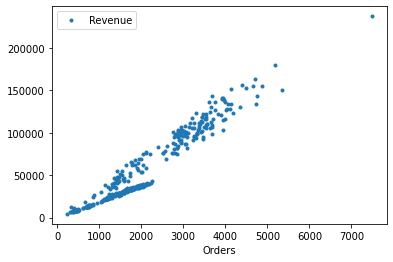

In [14]:
# Plot a graph to shows the relationship between Orders and revenue
df.plot(x = 'Orders', y = 'Revenue', style = '.')
plt.show()

In [15]:
# Attach tags to Day-column because it is identified as an independent variable with respect to revenue
days_map = {'Mon': 1, 'Tue': 2, 'Wed': 3, 'Thu': 4, 'Fri': 5, 'Sat': 6, 'Sun': 7}
df['Day'] = df['Day'].map(days_map)

In [16]:
# Attach tags to Month-column because it is identified as an independent variable with respect to revenue
months_map = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
df['Month'] = df['Month'].map(months_map)
df

,Date,Revenue,Orders,Day,Month,year
0,2019-01-01,8091,432,2,1,2019
1,2019-01-02,26898,1510,3,1,2019
2,2019-01-03,26131,1379,4,1,2019
3,2019-01-04,19428,1079,5,1,2019
4,2019-01-05,8921,459,6,1,2019
...,...,...,...,...,...,...
395,2020-01-31,136524,3605,5,1,2020
396,2020-02-01,38654,1150,6,2,2020
397,2020-02-02,33410,1252,7,2,2020
398,2020-02-03,87353,3055,1,2,2020


In [17]:
# Split dataset into training and testing for predicting the amont of orders
inde_factor = ['Day', 'Month']
ex = df[inde_factor]
y = df['Orders']
ex_train, ex_test, y_train, y_test = train_test_split(ex, y, test_size = 0.1) 
ex_test.head()

,Day,Month
89,7,3
168,2,6
30,4,1
71,3,3
124,7,5


In [18]:
# Initialize  a Decision Tree Classifier Model
DCT_model = DecisionTreeClassifier()
DCT_model.fit(ex_train, y_train)
y_pred = DCT_model.predict(ex_test)
ord_pred = pd.DataFrame({'Predicted-Orders': y_pred})
ord_pred.head()

,Predicted-Orders
0,682
1,1926
2,1379
3,1581
4,328


In [19]:
''' from the graph, the revenue generated is clearly linearly related with the number of 
 orders. So the best way to predict revenue is to predict the number of orders then fix it in the equation '''

' from the graph, the revenue generated is clearly linearly related with the number of \n orders. So the best way to predict revenue is to predict the number of orders then fix it in the equation '

In [20]:
# Split dataset into training and testing for predicting the revene generated
inde_factor = ['Orders']
x_r = df[inde_factor]
y_r = df['Revenue']
x_train, x_test, y_train, y_test = train_test_split(x_r, y_r, test_size = 0.1) 

In [21]:
linear_reg = LogisticRegression()
linear_reg.fit(x_train, y_train)
y_pred = linear_reg.predict(ord_pred)
rev_pred = pd.DataFrame({'Predicted-Revenue': y_pred})
rev_pred.head()

/home/qalac/Documents/Projects/Abuad/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,Predicted-Revenue
0,8152
1,38618
2,21547
3,32313
4,6594
